<h3>Univariate Analysis = Looking at One Thing at a Time</h3>
What it does: Checks if each measurement is weird by itself
Is this person's height unusual?
Is this person's weight unusual?
Is this test score unusual?

<h3>How it works:</h3>
Like checking if someone is too tall, too short, too heavy, or too light compared to everyone else
Example: In a class, John is 5'2" (short) and weighs 90 lbs (light). Both seem normal individually.
Multivariate Analysis = Looking at Everything Together
What it does: Checks if the combination of measurements is weird

Is this person's height AND weight combination unusual?
Do these test scores make sense together?

<h3>How it works:</h3>
Like a doctor noticing that someone's symptoms seem normal individually but weird when considered together
Example: John is 5'2" and weighs 90 lbs. Individually, these aren't extreme. But together? A 5'2" person weighing 90 lbs might be unusually thin - this combination could be an outlier even though each number alone isn't.
The Key Difference

Univariate: "Is this number strange?"
Multivariate: "Is this combination of numbers strange?"

<h3>When to Use Which</h3>

Univariate: When you want simple, quick checks
Multivariate: When relationships between your data matter (which is most of the time in real life)

Bottom line: Multivariate catches outliers that univariate misses because it looks at the whole picture, not just individual pieces.

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = 5, 4

In [19]:
# loading the iris dataset, assigning column names, and separating features and labels (x is features, y is labels)

path = "C:\\Users\\UserPC\\Desktop\\my_folder\\Learning alongside DProf\\kaggle and LinkedIn\\datasets\\iris.csv"
df = pd.read_csv(path)
df.columns = ['Index', 'Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Species']
df = df.drop('Index', axis=1)
x = df.iloc[:, 0:4].values
y = df.iloc[:, 4].values
df.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


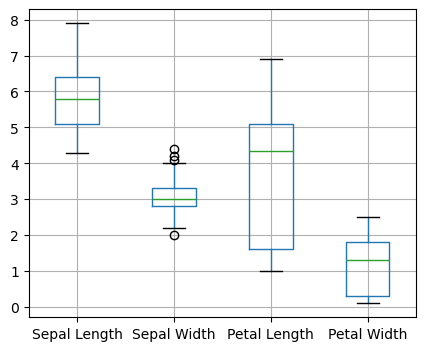

In [20]:
# using box plots to visualize outliers in the dataset.  outliers will appear as points outside the whiskers of the box plot.

df.boxplot(return_type='dict')
plt.show()

In [21]:
# isolating outliers in the sepal width feature.  here, we define outliers as any value less than or equal to 2.0 or greater than 4.0 (as visualised in the box plot above).

sepal_width = x[:, 1]
iris_outliers = (sepal_width <= 2.0) | (sepal_width > 4.0)
df[iris_outliers]

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
15,5.7,4.4,1.5,0.4,setosa
32,5.2,4.1,1.5,0.1,setosa
33,5.5,4.2,1.4,0.2,setosa
60,5.0,2.0,3.5,1.0,versicolor


In [22]:
# univariate feature statistics to see the effect of outliers on the mean and standard deviation

pd.options.display.float_format = '{:.1f}'.format
x_data = pd.DataFrame(x)
print(x_data.describe())

          0     1     2     3
count 150.0 150.0 150.0 150.0
mean    5.8   3.1   3.8   1.2
std     0.8   0.4   1.8   0.8
min     4.3   2.0   1.0   0.1
25%     5.1   2.8   1.6   0.3
50%     5.8   3.0   4.3   1.3
75%     6.4   3.3   5.1   1.8
max     7.9   4.4   6.9   2.5


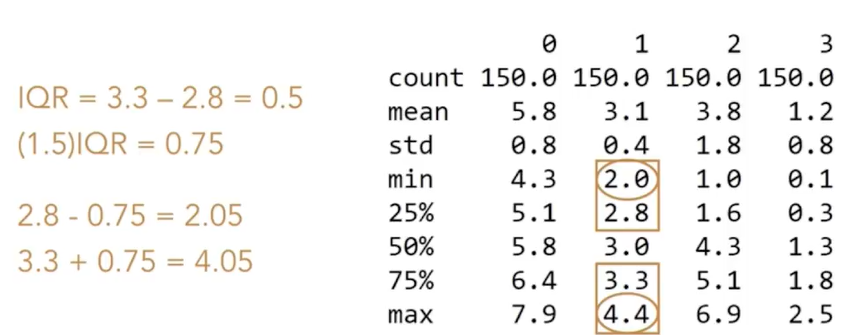

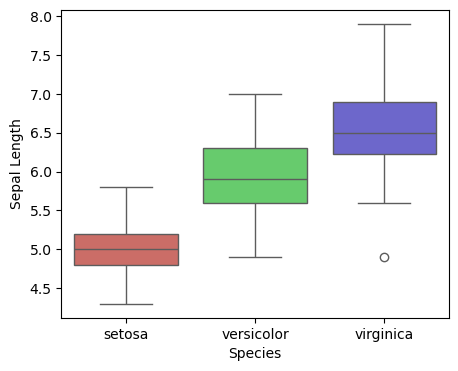

In [ ]:
# box plot using seaborn to visualise outliers in just the sepal length feature, grouped by species

sns.boxplot(data=df, x='Species', y='Sepal Length', hue='Species', palette='hls', legend=False)
plt.show()

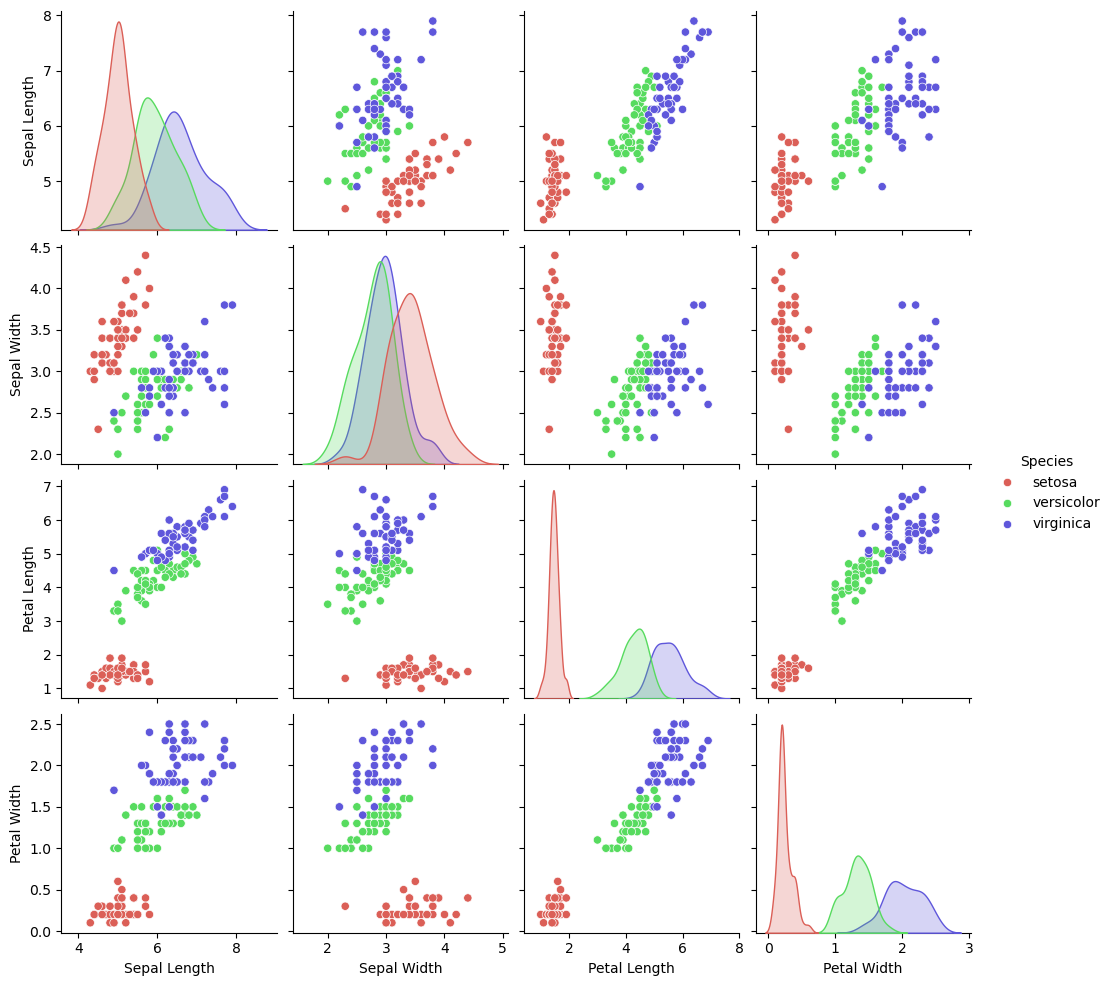

In [ ]:
# pair plot using seaborn to visualise potential multivariate outliers in the dataset
# here, we can see that there are some potential multivariate outliers in the iris dataset, particularly in the setosa species and the petal width feature

sns.pairplot(df, hue='Species', palette='hls')
plt.show()